In [15]:
# Importando as bibliotecas necessárias
import pandas as pd

# Aqui fazemos o fim da analise exploratória, transformamos os nulos em valores "medianos", criamos pipeline, aplicamos Imputer, Scaler, Algoritmos, Metricas


# Importando a base de dados
dataset = pd.read_csv(r"F:\Projetos_Pessoais\fase1\content\sample_data\diabetes_novo.csv", sep=';')
# dataset = pd.read_csv("/content/sample_data/diabetes.csv")

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
dataset.info(); # tipo de dado colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [17]:
dataset.shape

(768, 9)

In [18]:
#visualizar todos os campos numéricos.
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

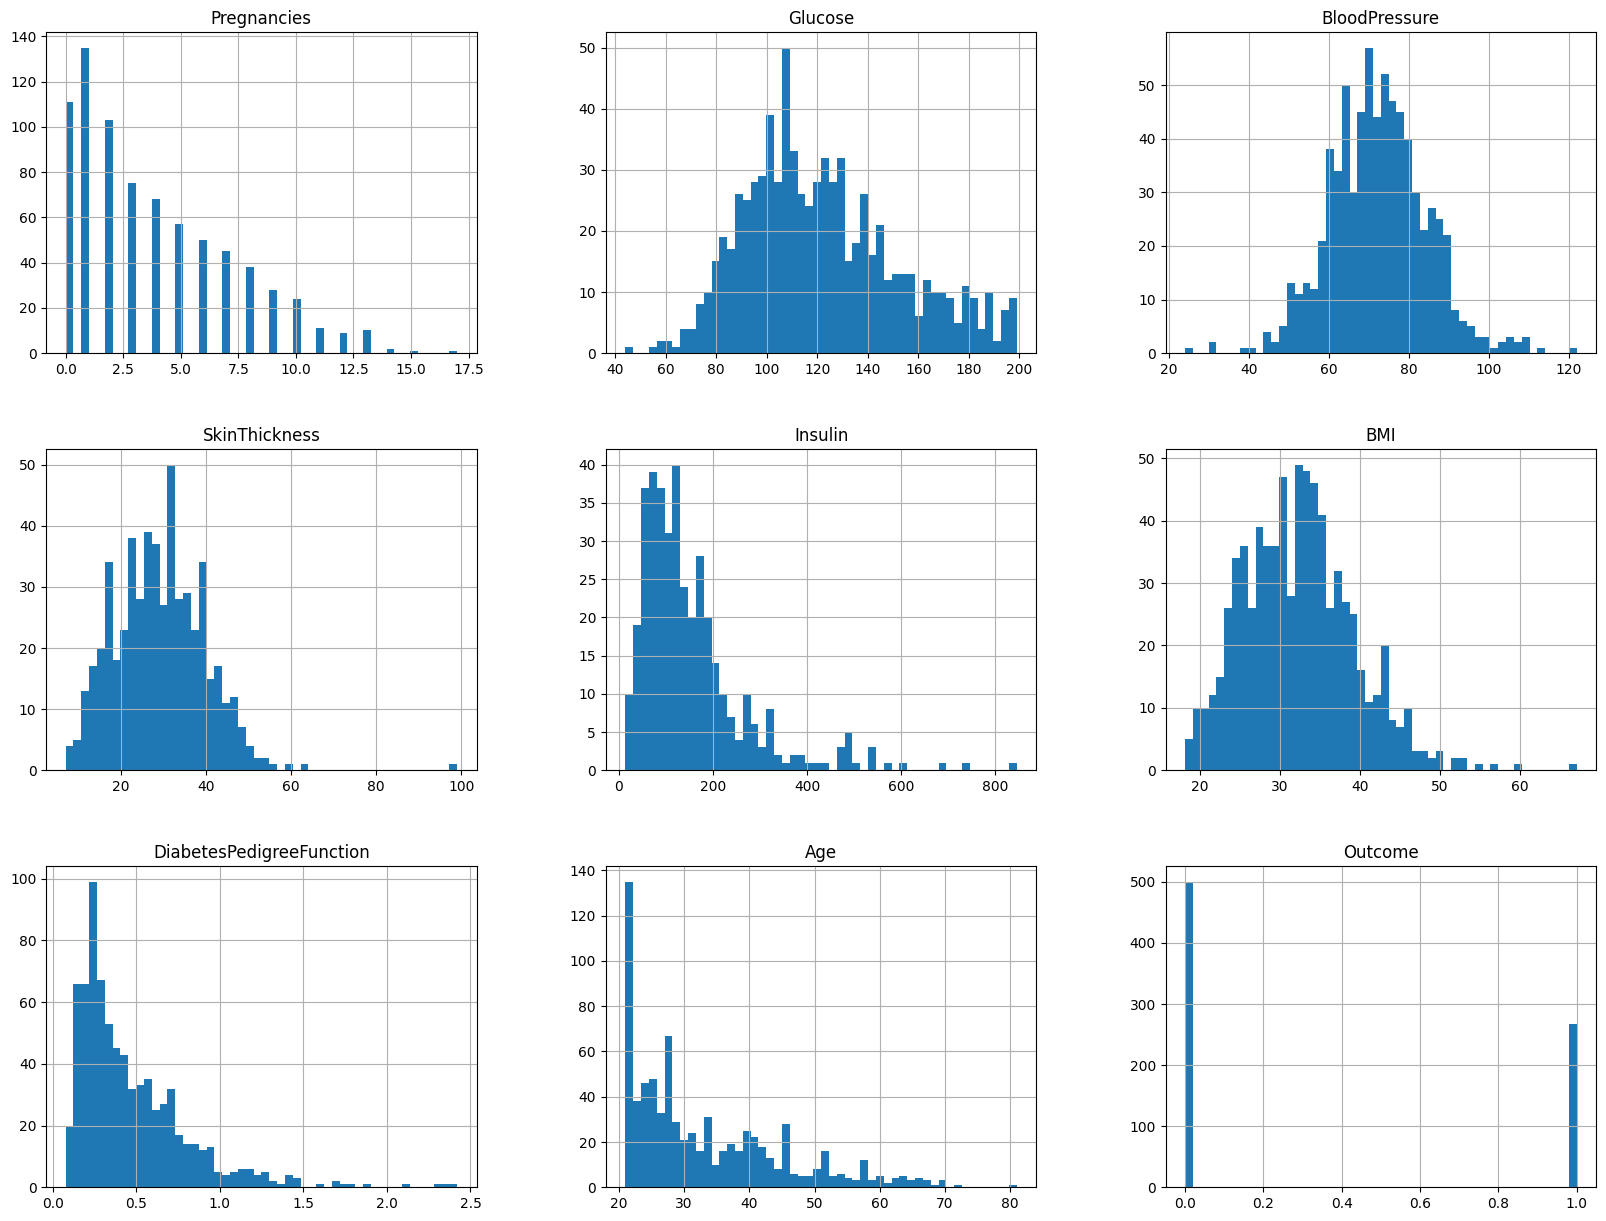

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

# eixo X mostra os valores da dimensao e Y quantidade de vezes em proporção grafica

<Axes: >

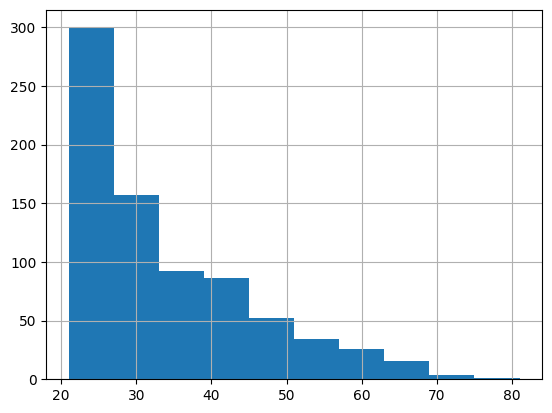

In [20]:
dataset["Age"].hist()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

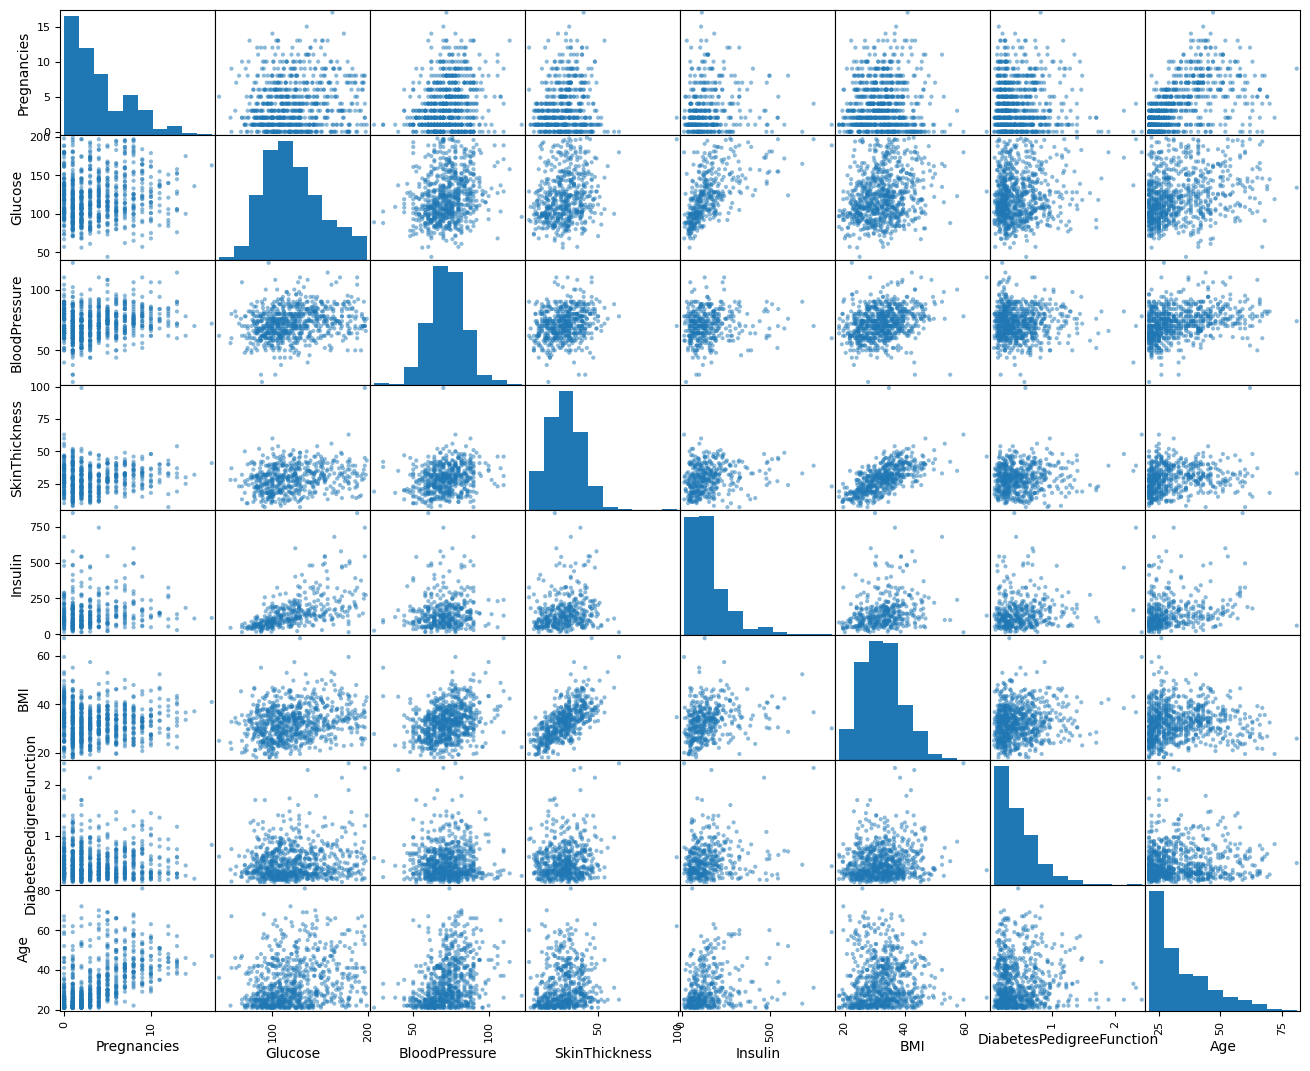

In [21]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

#Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age 	Outcom

attributes = ["Pregnancies", "Glucose", "BloodPressure",
              "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

scatter_matrix(dataset[attributes], figsize=(16, 13))


In [22]:

#import seaborn as sb

#sb.set_theme(style="whitegrid", palette="muted")

#ax = sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
#ax = sb.swarmplot(data=dataset, x="Glucose", y="Outcome")
#ax.set(ylabel="")


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

x = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Outcome']


In [24]:
#KNeighborsClassifier
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#(LogisticRegression)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

#(RandomForestClassifier)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#SVC
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#GradientBoostingClassifier
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

#XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

In [25]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
110,3,171.0,72.0,33.0,135.0,33.3,0.199,24
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24
323,13,152.0,90.0,33.0,29.0,26.8,0.731,43
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28
...,...,...,...,...,...,...,...,...
213,0,140.0,65.0,26.0,130.0,42.6,0.431,24
113,4,76.0,62.0,NaN,NaN,34.0,0.391,25
556,1,97.0,70.0,40.0,NaN,38.1,0.218,30
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44


In [ ]:

# # Definindo o espaço de hiperparâmetros para busca
# param_grid = {
#     'C': [0.1, 1, 10, 100],                   # Regularização
#     'kernel': ['linear', 'rbf', 'poly'],      # Tipos de kernel
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1], # Coeficiente Kernel
#     'class_weight': [None, 'balanced']        # Para classes desbalanceadas
# }


# 3. CRIAÇÃO E TREINAMENTO DO PIPELINE
pipeline_completo = Pipeline([
    # Etapa 1: Imputação da Mediana (Calcula a mediana APENAS em X_train)
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),

    # Etapa 2: Padronização (Calcula estatísticas APENAS no X_train, APÓS imputação)
    ('scaler', StandardScaler()),

    # Etapa 3: Classificador
    #('model', KNeighborsClassifier(n_neighbors=5))

    #('model', LogisticRegression(random_state=42, max_iter=1000))

    #('model', RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42))

    #('model', SVC(kernel='rbf', random_state=42))
    #('model', SVC(random_state=42))

    #('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))

    ('model', XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42))
    #('model', XGBClassifier(n_estimators=100, eval_metric='logloss', use_label_encoder=False, random_state=42))


])

In [27]:

# # * Especifico SVC - 3. Definindo o Espaço de Hiperparâmetros - Buscar melhores Hiperparâmetros
# # Para o Pipeline, o nome dos parâmetros deve ser prefixado pelo nome do passo (ex: 'svc__C')
# param_grid = {
#     'model__C': [0.1, 1, 10, 100],                   # C do SVC
#     'model__kernel': ['linear', 'rbf'],              # Kernel do SVC
#     'model__gamma': ['scale', 0.01, 0.1, 1],         # Gamma do SVC (importante para 'rbf')
#     'model__class_weight': [None, 'balanced']        # Ajuste de peso de classes
# }

# # 4. Executando o Grid Search com o Pipeline
# # O GridSearchCV agora testa todas as combinações DENTRO do pipeline,
# # ajustando o StandardScaler em cada fold de treino
# grid_search = GridSearchCV(
#     estimator=pipeline_completo,
#     param_grid=param_grid,
#     scoring='roc_auc',  # Métrica de avaliação
#     cv=5,               # Validação cruzada com 5 folds
#     verbose=2,          # Nível de detalhe do output
#     n_jobs=-1           # Usa todos os núcleos de CPU disponíveis
# )

# # Treinamento: A busca em grade ajusta o Pipeline
# grid_search.fit(x_train, y_train)

# # 5. Visualizando os Resultados
# print("--- Resultados do Grid Search ---")
# print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
# print(f"Melhor pontuação (AUC/CV): {grid_search.best_score_:.4f}")

# # O modelo final otimizado está em .best_estimator_
# best_model = grid_search.best_estimator_

# # Avaliação no conjunto de Teste (importante para uma avaliação final não enviesada)
# test_score = best_model.score(x_test, y_test)
# print(f"Pontuação de acurácia no Teste: {test_score:.4f}")


In [ ]:

# Ajusta o pipeline (aprende a mediana e as estatísticas de padronização em X_train)
pipeline_completo.fit(x_train, y_train)

print("--- Pipeline Treinado com Sucesso ---")


--- Pipeline Treinado com Sucesso ---


In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:


# Exibir valores padronizados
# BUSCANDO OS VALORES PADRONIZADOS - do penúltimo passo (o StandardScaler) diretamente.

# Assume que pipeline_completo foi ajustado (fit) no X_train

# Acessa o objeto StandardScaler ajustado dentro do pipeline
scaler_object = pipeline_completo.named_steps['scaler']

# Agora, você usa o método transform() do StandardScaler para ver os dados.
# ATENÇÃO: Os dados de entrada PRECISAM passar pelo imputador ANTES.
# Você teria que aplicar o imputer manualmente primeiro, o que é mais complicado:

# 1. Imputar:
imputer_object = pipeline_completo.named_steps['imputer']
X_train_imputed = imputer_object.transform(x_train)

# 2. Padronizar e visualizar:
X_train_scaled_array = scaler_object.transform(X_train_imputed)

X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=x_train.columns)
print("\n--- Dados de Treino Padronizados (Acesso Direto) ---")
print(X_train_scaled.head())





--- Dados de Treino Padronizados (Acesso Direto) ---
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.257043  1.635558      -0.023962       0.460625 -0.030979  0.133342   
1     0.634404  0.044485      -0.023962       1.829379  1.194338  0.177759   
2    -0.554192  1.735000       1.284770       0.916876 -0.224450  1.791574   
3     2.714447  1.005758       1.448361       0.460625 -1.398176 -0.829025   
4    -1.148490  2.530537      -0.514736       0.346562  1.761854  1.317793   

   DiabetesPedigreeFunction       Age  
0                 -0.837798 -0.799850  
1                  0.787395  0.050333  
2                  0.522616 -0.799850  
3                  0.781308  0.815497  
4                  0.084362 -0.459777  


In [41]:
#x
x_train.head()

#x_test.shape
#y_test.shape



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
110,3,171.0,72.0,33.0,135.0,33.3,0.199,24
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24
323,13,152.0,90.0,33.0,29.0,26.8,0.731,43
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28


In [32]:

# 4. AVALIAÇÃO
# Ao chamar score/predict, o X_test é processado sequencialmente pelo imputer (usando medianas do treino)
# e pelo scaler (usando estatísticas do treino), garantindo que não haja vazamento de dados.
accuracy_pipe = pipeline_completo.score(x_test, y_test)
#print("Score Pipeline: {:.2f}%".format(accuracy_pipe*100))
print(f"Score Pipeline: {accuracy_pipe:.4f}")


# 3.3. PREDIÇÃO NO CONJUNTO DE TESTE
# O predict() garante que X_test seja processado (imputado e padronizado)
y_pred = pipeline_completo.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

results = {} # se for usar um for

# Acurácia (Accuracy)
acc = accuracy_score(y_test, y_pred)

# Reporte de Classificação (inclui Precision, Recall e F1-score por classe)
report = classification_report(y_test, y_pred, zero_division=0)

# Exibição no console
print(f"Acurácia Geral: {acc:.4f}")
print("\nRelatório de Classificação (Precision, Recall, F1-score):")
print(report)


Score Pipeline: 0.8190
Acurácia Geral: 0.8190

Relatório de Classificação (Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        76
           1       0.73      0.75      0.74        40

    accuracy                           0.82       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



In [33]:
# Exemplo 1: Uma única amostra de 5 features
new_data_sample = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
#modelo_classificador.predict([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# O .predict() fará o seguinte automaticamente com new_data_sample:
# 1. Imputação: Usa as medianas calculadas no X_train.
# 2. Padronização: Usa a média e o desvio padrão calculados no X_train.
# 3. Classificação: Passa os dados pré-processados para o KNN.
prediction = pipeline_completo.predict(new_data_sample)

print(f"\nDados de Entrada: {new_data_sample}")
print(f"Previsão da Classe (Exemplo 1): {prediction[0]}")


Dados de Entrada: [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
Previsão da Classe (Exemplo 1): 1


f:\Projetos_Pessoais\fase1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [34]:
# 1, 85, 66, 29, 0, 26.6, 0.351, 31

new_data_sample = np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])


# O .predict() fará o seguinte automaticamente com new_data_sample:
# 1. Imputação: Usa as medianas calculadas no X_train.
# 2. Padronização: Usa a média e o desvio padrão calculados no X_train.
# 3. Classificação: Passa os dados pré-processados para o KNN.
prediction = pipeline_completo.predict(new_data_sample)

print(f"\nDados de Entrada: {new_data_sample}")
print(f"Previsão da Classe (Exemplo 1): {prediction[0]}")


Dados de Entrada: [[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]]
Previsão da Classe (Exemplo 1): 0


f:\Projetos_Pessoais\fase1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:

#6 	148.0 	72.0 	35.0 	NaN 	33.6 	0.627 	50 - OUT=1

new_data_sample = np.array([[6, 148.0, 72.0, 35.0, None, 33.6, 0.627, 50]])

# O .predict() fará o seguinte automaticamente com new_data_sample:
# 1. Imputação: Usa as medianas calculadas no X_train.
# 2. Padronização: Usa a média e o desvio padrão calculados no X_train.
# 3. Classificação: Passa os dados pré-processados para o KNN.
prediction = pipeline_completo.predict(new_data_sample)

print(f"\nDados de Entrada: {new_data_sample}")
print(f"Previsão da Classe (Exemplo 1): {prediction[0]}")




Dados de Entrada: [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
Previsão da Classe (Exemplo 1): 1


f:\Projetos_Pessoais\fase1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [36]:
# ------------------------------------------------------------------------------
# SEÇÃO SHAP (INTERPRETABILIDADE)
# ------------------------------------------------------------------------------

import shap

# ------------------------------------------------------------------------------
# SEÇÃO SHAP CORRIGIDA (Compatibilidade Máxima com KernelExplainer)
# ------------------------------------------------------------------------------

print("\n--- Análise de Interpretabilidade (SHAP) ---")

# 1. Pré-processamento dos Dados de Teste (MANTIDO IGUAL)
imputer = pipeline_completo['imputer']
scaler = pipeline_completo['scaler']

x_test_processed = scaler.transform(imputer.transform(x_test))
feature_names = x.columns.tolist()
x_test_processed = pd.DataFrame(x_test_processed, columns=feature_names)

# 2. DEFINIÇÃO DO BACKGROUND DATA
# O KernelExplainer exige uma amostra dos dados de treino (background) para calcular
# o valor base. Usamos agora o DataFrame/array NumPy diretamente.
x_train_processed = scaler.transform(imputer.transform(x_train))
x_train_processed = pd.DataFrame(x_train_processed, columns=feature_names)

# CORREÇÃO PRINCIPAL: Usar a amostra do DataFrame/array NumPy diretamente.
# Amostragem de 100 instâncias para acelerar o KernelExplainer
background_data = x_train_processed.sample(100, random_state=42)


# 3. DEFINIÇÃO DA FUNÇÃO DE PREDIÇÃO (MANTIDA IGUAL)
def f(X):
    # Retorna as probabilidades da CLASSE POSITIVA (Diabetes, índice 1)
    return pipeline_completo['model'].predict_proba(X)[:, 1]

# 4. CRIAÇÃO DO EXPLICADOR
# Passamos o DataFrame (background_data) e não o objeto maskers.Independent.
explainer = shap.KernelExplainer(f, background_data)

# 5. CÁLCULO DOS SHAP VALUES
# AVISO: Esta etapa será LENTA!
print("\nAVISO: O KernelExplainer é lento. O cálculo pode levar alguns minutos...")
shap_values = explainer.shap_values(x_test_processed)





--- Análise de Interpretabilidade (SHAP) ---

AVISO: O KernelExplainer é lento. O cálculo pode levar alguns minutos...


  0%|          | 0/116 [00:00<?, ?it/s]


--- 1. Importância Global das Features (Resumo) ---


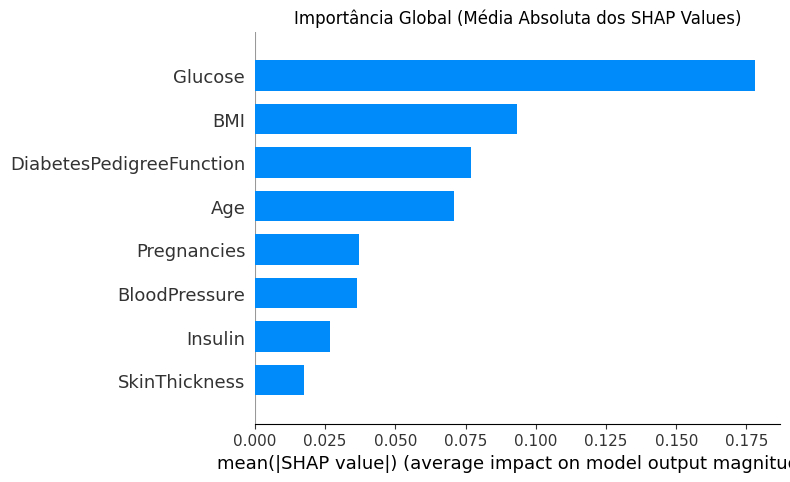

In [37]:
# ==============================================================================
# VISUALIZAÇÕES
# ==============================================================================

shap_data = shap_values

print("\n--- 1. Importância Global das Features (Resumo) ---")
shap.summary_plot(shap_data, x_test_processed, plot_type="bar", show=False)
plt.title("Importância Global (Média Absoluta dos SHAP Values)")
plt.show()



--- 2. Importância Global Detalhada (Summary Plot) ---


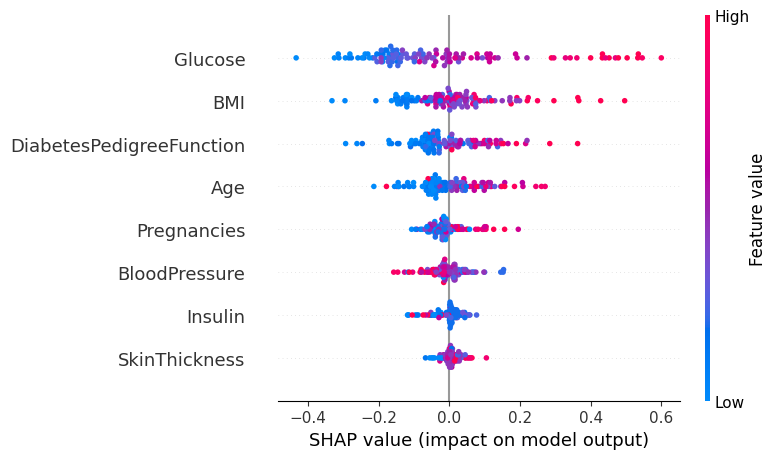

In [38]:

# ==============================================================================
# VISUALIZAÇÃO GLOBAL DETALHADA (Summary Plot)
# ==============================================================================

print("\n--- 2. Importância Global Detalhada (Summary Plot) ---")
# Mostra o impacto (eixo X) e a direção (cor) de cada feature
shap.summary_plot(shap_data, x_test_processed)



In [39]:

# ==============================================================================
# ANÁLISE LOCAL (Explicação de uma Previsão Individual)
# ==============================================================================

# Explicando a previsão para a primeira instância do conjunto de teste (paciente de índice 0)
#idx = 0
idx = 11
print(f"\n--- 3. Explicação Local (Previsão para a Instância {idx}) ---")

# Previsão de probabilidade da CLASSE 1 (Diabetes) usando o Pipeline completo nos dados originais
prediction_proba = pipeline_completo.predict_proba(x_test.iloc[[idx]])[0][1]
print(f"Previsão do Modelo (Probabilidade de Diabetes): {prediction_proba:.4f}")

# O Force Plot é interativo e requer o valor esperado (expected_value)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_data[idx], x_test_processed.iloc[idx])



--- 3. Explicação Local (Previsão para a Instância 11) ---
Previsão do Modelo (Probabilidade de Diabetes): 0.2971
